In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
glass = pd.read_csv("glass.csv")
array = glass.values
x = array[:,0:-1]
y = array[:,-1]

In [3]:
glass.duplicated().sum()

1

In [4]:
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
x = (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=19)

In [10]:
model =  KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.6923076923076923

In [11]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.63      0.85      0.72        20
         2.0       0.71      0.55      0.62        22
         3.0       0.00      0.00      0.00         4
         5.0       0.71      0.71      0.71         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.69        65
   macro avg       0.66      0.64      0.64        65
weighted avg       0.68      0.69      0.68        65



# visualizing the CV results

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,x_train,y_train,cv = 10)
    k_scores.append(scores.mean())
    print("k value=",k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(classification_report(y_test,pred))

k value= 1
              precision    recall  f1-score   support

         1.0       0.63      0.85      0.72        20
         2.0       0.71      0.55      0.62        22
         3.0       0.00      0.00      0.00         4
         5.0       0.71      0.71      0.71         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.69        65
   macro avg       0.66      0.64      0.64        65
weighted avg       0.68      0.69      0.68        65

k value= 3
              precision    recall  f1-score   support

         1.0       0.60      0.90      0.72        20
         2.0       0.72      0.59      0.65        22
         3.0       0.00      0.00      0.00         4
         5.0       0.60      0.43      0.50         7
         6.0       1.00      0.50      0.67         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.68        65
 

k value= 31
              precision    recall  f1-score   support

         1.0       0.55      0.90      0.68        20
         2.0       0.82      0.64      0.72        22
         3.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         4
         7.0       0.53      1.00      0.70         8

    accuracy                           0.62        65
   macro avg       0.32      0.42      0.35        65
weighted avg       0.51      0.62      0.54        65

k value= 33
              precision    recall  f1-score   support

         1.0       0.50      0.85      0.63        20
         2.0       0.75      0.55      0.63        22
         3.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         4
         7.0       0.53      1.00      0.70         8

    accuracy                           0.57        65

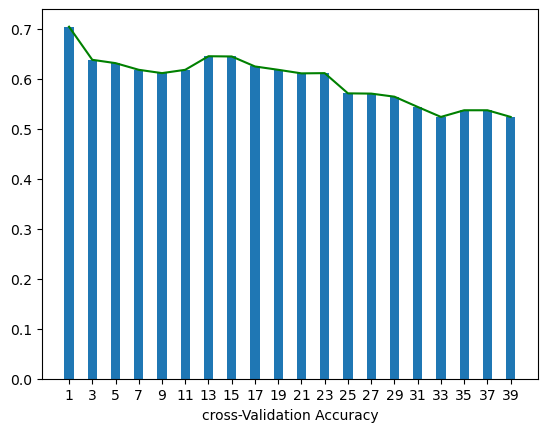

In [17]:
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores , color = "green")
plt.xlabel('value of k for knn')
plt.xlabel('cross-Validation Accuracy')
plt.xticks(k_range)
plt.show()

In [18]:
np.argmax(k_scores)

0

In [19]:
k_range[0]

1

In [20]:
k_scores[1]

0.6380952380952382

In [23]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.63      0.85      0.72        20
         2.0       0.71      0.55      0.62        22
         3.0       0.00      0.00      0.00         4
         5.0       0.71      0.71      0.71         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.69        65
   macro avg       0.66      0.64      0.64        65
weighted avg       0.68      0.69      0.68        65

